<a href="https://colab.research.google.com/github/HGF-AA/Python/blob/main/Presentation_3(TimeSeriesAnalysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentation 3 -- Best Buy Data

### Setting Up Data, Click to Run when first starting


In [ ]:
#Basic Setup, Importing Data
from google.colab import files
from google.colab import drive

import pandas as pd
import io

drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
df_securities = pd.read_csv('/content/drive/MyDrive/Pres 3/Pres3Data/securities.csv')

df_prices = pd.read_csv('/content/drive/MyDrive/Pres 3/Pres3Data/prices.csv')

data = pd.merge(df_prices, df_securities, left_on='symbol', right_on='Ticker symbol', how='left')
data.head(5)


date symbol        open       close         low        high  \
0  2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
1  2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2  2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
3  2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
4  2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   

      volume Ticker symbol              Security SEC filings GICS Sector  \
0  2163600.0          WLTW  Willis Towers Watson     reports  Financials   
1  2386400.0          WLTW  Willis Towers Watson     reports  Financials   
2  2489500.0          WLTW  Willis Towers Watson     reports  Financials   
3  2006300.0          WLTW  Willis Towers Watson     reports  Financials   
4  1408600.0          WLTW  Willis Towers Watson     reports  Financials   

   GICS Sub Industry Address of Headquarters Date first added      CIK  
0  Insurance Brokers  London, United Kingdom       2016-01-05  1140536  
1  Insurance Brokers  London, United Kingdom       2016-01-05  1140536  
2  Insurance Brokers  London, United Kingdom       2016-01-05  1140536  
3  Insurance Brokers  London, United Kingdom       2016-01-05  1140536  
4  Insurance Brokers  London, United Kingdom       2016-01-05  1140536

In [ ]:
data.shape

(851264, 15)

In [ ]:
# Convert 'date' column to datetime using the 'mixed' format to handle mixed date formats
data['date'] = pd.to_datetime(data['date'], format='mixed', errors='coerce')
data.set_index('date', inplace=True)

### Getting Apple Data

In [ ]:
#Example for getting a single company

apple_df = data[data['symbol'] == 'AAPL']
apple_df.head()


In [ ]:
# prompt: Download the apple_df csv

apple_df.to_csv('apple_df.csv')
files.download('apple_df.csv')


In [ ]:
#Basic Time Series Attempt 1 by ChatGPT
import pandas as pd
import matplotlib.pyplot as plt

# Plot the end-of-day or closing prices (assuming the column is named 'Close')
plt.figure(figsize=(10,6))
plt.plot(apple_df['close'], label='End of Day Value')

# Adding titles and labels
plt.title('End of Day Value Over Time')
plt.xlabel('Date')
plt.ylabel('End of Day Value')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


In [ ]:
#ChatGPT 30 Day Moving Series Avg
import matplotlib.pyplot as plt

# Create a 30-day moving average column for the 'close' prices
apple_df['30_day_MA'] = apple_df['close'].rolling(window=30).mean()

# Plot the 'close' prices and 30-day moving average
plt.figure(figsize=(10,6))
plt.plot(apple_df['close'], label='End of Day Value (Close)', color='blue')
plt.plot(apple_df['30_day_MA'], label='30-Day Moving Average', color='orange')

# Adding titles and labels
plt.title('Apple End of Day Value and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


### Amazon Data

In [ ]:
#Get AMZN Data
amazon_df = data[data['symbol'] == 'AMZN']

# Assuming the date column is labeled 'date' or you can change it to the correct column name
# If 'date' exists in the columns, it will be converted
# If 'date' does not exist, nothing happens
if 'date' in amazon_df.columns:
    amazon_df['date'] = pd.to_datetime(amazon_df['date'], format='mixed', errors='coerce')

# Set the index to the 'date' column if it exists, otherwise keep the existing index
if 'date' in amazon_df.columns:
    amazon_df.set_index('date', inplace=True)

# Drop rows with NaN values in the 'close' column
amazon_df.dropna(subset=['close'], inplace=True)

# Optionally, you can check the shape of the DataFrame to see how many rows remain
print(f"Remaining rows after dropping NaN values: {amazon_df.shape[0]}")

amazon_df.head()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Assuming 'close' is the column you want to decompose
# Resample to daily frequency and fill missing values with forward fill
amazon_df_daily = amazon_df.resample('D').asfreq()  # Resample to daily frequency
amazon_df_daily['close'] = amazon_df_daily['close'].fillna(method='ffill') # Fill missing values using forward fill

result = seasonal_decompose(amazon_df_daily['close'], model='additive', period = 60)

# Plot the decomposed components
result.plot()
plt.show()


In [ ]:
#ChatGPT Plotly Try 1
import pandas as pd
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming apple_df is already loaded and the 'date' column is the index
# Ensure the index is a DatetimeIndex and set frequency to daily
apple_df.index = pd.to_datetime(apple_df.index)
# The frequency might not be daily, attempting to force might introduce NaNs
# Let's try to infer the frequency first
inferred_freq = pd.infer_freq(apple_df.index)
if inferred_freq is None:
    # If frequency can't be inferred, assume daily but handle potential NaNs
    apple_df = apple_df.asfreq('D')
    apple_df['close'] = apple_df['close'].fillna(method='ffill') # Replace NaN with previous valid value.
else:
    # If frequency can be inferred, use it
    apple_df = apple_df.asfreq(inferred_freq)

# Drop any rows with NaN in 'close' - just in case the above didn't fix them all
apple_df.dropna(subset=['close'], inplace=True)

# Perform seasonal decomposition, specifying period if necessary
# If the frequency is daily and you expect yearly seasonality, period would be 365
result = seasonal_decompose(apple_df['close'], model='additive', period=365 if inferred_freq == 'D' else None) # Adjust if other frequency


# Create traces for each component
observed = go.Scatter(x=result.observed.index, y=result.observed, mode='lines', name='Observed', line=dict(color='blue'))
trend = go.Scatter(x=result.trend.index, y=result.trend, mode='lines', name='Trend', line=dict(color='orange'))
seasonal = go.Scatter(x=result.seasonal.index, y=result.seasonal, mode='lines', name='Seasonal', line=dict(color='green'))
residual = go.Scatter(x=result.resid.index, y=result.resid, mode='lines', name='Residual', line=dict(color='red'))

# Create the figure and add traces
fig = go.Figure()
fig.add_trace(observed)
fig.add_trace(trend)
fig.add_trace(seasonal)
fig.add_trace(residual)

# Update layout
fig.update_layout(title='Seasonal Decomposition of Apple End of Day Value',
                  xaxis_title='Date',
                  yaxis_title='Value',
                  legend=dict(x=0.1, y=1.1, orientation='h'),
                  height=600)

# Show the plot
fig.show()



### Company Listing


In [ ]:
# prompt: List Different Ticker Symbols in data. Don't show repeats. When listing, also print the Security in the same row. List 100. Colab isn't showing all 100. Make it show all 100

# Get unique ticker symbols and their corresponding securities
unique_symbols = data[['symbol', 'Security']].drop_duplicates().head(300)

# Print the list of unique symbols and securities
pd.set_option('display.max_rows', None)  # Show all rows
print(unique_symbols)


## Best Buy Data


### Best Buy Start

In [ ]:
#Getting Best Buy Data
#Example for getting a single company

BBY_df = data[data['symbol'] == 'BBY']
BBY_df.head()

symbol       open      close        low       high      volume  \
date                                                                        
2010-01-04    BBY  39.840000  40.189999  39.630001  40.580002   6433800.0   
2010-01-05    BBY  40.540001  41.209999  40.500000  41.500000   6979200.0   
2010-01-06    BBY  41.209999  40.889999  40.660000  41.340000   4192500.0   
2010-01-07    BBY  40.799999  41.540001  40.700001  41.590000   8762000.0   
2010-01-08    BBY  40.639999  39.910000  39.750000  40.860001  14177900.0   

           Ticker symbol           Security SEC filings  \
date                                                      
2010-01-04           BBY  Best Buy Co. Inc.     reports   
2010-01-05           BBY  Best Buy Co. Inc.     reports   
2010-01-06           BBY  Best Buy Co. Inc.     reports   
2010-01-07           BBY  Best Buy Co. Inc.     reports   
2010-01-08           BBY  Best Buy Co. Inc.     reports   

                       GICS Sector              GICS Sub Industry  \
date                                                                
2010-01-04  Consumer Discretionary  Computer & Electronics Retail   
2010-01-05  Consumer Discretionary  Computer & Electronics Retail   
2010-01-06  Consumer Discretionary  Computer & Electronics Retail   
2010-01-07  Consumer Discretionary  Computer & Electronics Retail   
2010-01-08  Consumer Discretionary  Computer & Electronics Retail   

           Address of Headquarters Date first added     CIK  
date                                                         
2010-01-04    Richfield, Minnesota              NaN  764478  
2010-01-05    Richfield, Minnesota              NaN  764478  
2010-01-06    Richfield, Minnesota              NaN  764478  
2010-01-07    Richfield, Minnesota              NaN  764478  
2010-01-08    Richfield, Minnesota              NaN  764478

In [ ]:
# prompt: download BBY_df

BBY_df.to_csv('BBY_df.csv')
files.download('BBY_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Time Series Data

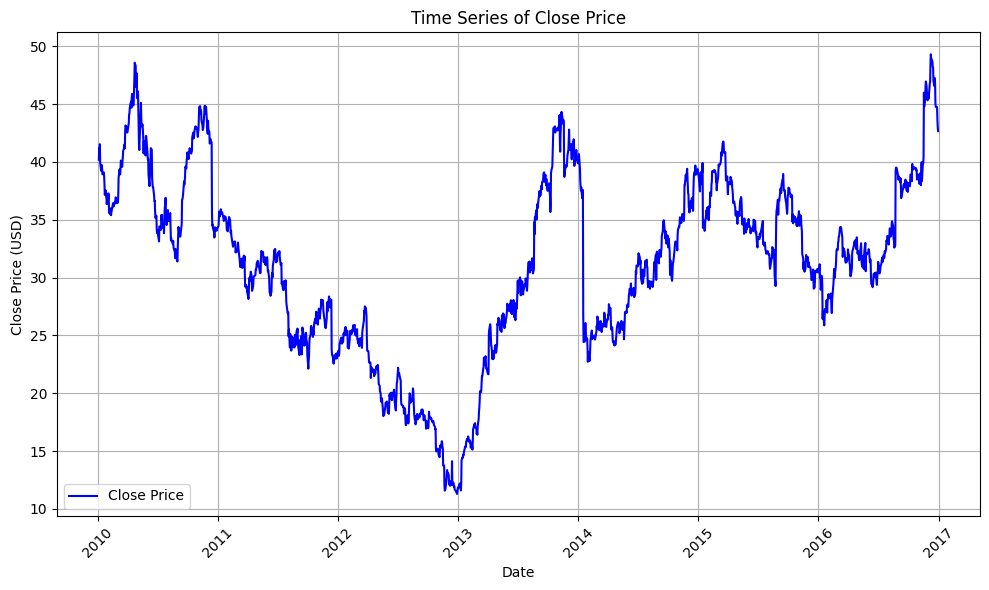

In [ ]:
import matplotlib.pyplot as plt

# Plot the "close" price over time
plt.figure(figsize=(10, 6))
plt.plot(BBY_df.index, BBY_df['close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.title('Time Series of Close Price')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#ChatGPT Take Two: Mousing Over
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.io import push_notebook

# Ensure the output will display in the notebook
output_notebook()

# Create a figure with the updated 'width' and 'height' attributes
p = figure(x_axis_type="datetime", width=800, height=400, title="Time Series of Close Price")

# Add a line for close prices
p.line(BBY_df.index, BBY_df['close'], color='blue', legend_label='Close Price')

# Add hover tool to display date and close price
hover = HoverTool()
hover.tooltips = [("Date", "@x{%F}"), ("Close Price", "@y{$0.2f}")]
hover.formatters = {"@x": "datetime"}

p.add_tools(hover)

# Customize labels and grid
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Close Price (USD)'
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0.3

# Show the plot
show(p, notebook_handle=True)



In [ ]:
#ChatGPT Time Series Data w/ 30 Day Moving Average
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.io import push_notebook

# Ensure the output will display in the notebook
output_notebook()

# Calculate the 30-day moving average
BBY_df['30_day_MA'] = BBY_df['close'].rolling(window=30).mean()

# Create a figure with updated 'width' and 'height' attributes
p = figure(x_axis_type="datetime", width=800, height=400, title="Time Series of Close Price with 30-Day Moving Average")

# Add a line for close prices
p.line(BBY_df.index, BBY_df['close'], color='blue', legend_label='Close Price')

# Add a line for 30-day moving average
p.line(BBY_df.index, BBY_df['30_day_MA'], color='orange', legend_label='30-Day MA', line_dash='dashed')

# Add hover tool to display date and close price
hover = HoverTool()
hover.tooltips = [("Date", "@x{%F}"), ("Close Price", "@y{$0.2f}")]
hover.formatters = {"@x": "datetime"}

p.add_tools(hover)

# Customize labels and grid
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Close Price (USD)'
p.legend.location = "bottom_left"
p.grid.grid_line_alpha = 0.3

# Show the plot
show(p, notebook_handle=True)



<ipython-input-9-2dacbba47df6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df['30_day_MA'] = BBY_df['close'].rolling(window=30).mean()


In [ ]:
#ChatGPT Attempt 2
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.io import push_notebook

# Ensure the output will display in the notebook
output_notebook()

# Calculate the 30-day moving average
BBY_df['30_day_MA'] = BBY_df['close'].rolling(window=30).mean()

# Create a figure with updated 'width' and 'height' attributes
p = figure(x_axis_type="datetime", width=800, height=400, title="Time Series of Close Price with 30-Day Moving Average")

# Add a line for close prices
p.line(BBY_df.index, BBY_df['close'], color='blue', legend_label='Close Price')

# Add a solid line for 30-day moving average
p.line(BBY_df.index, BBY_df['30_day_MA'], color='orange', legend_label='30-Day MA')

# Add hover tool to display date and close price
hover = HoverTool()
hover.tooltips = [("Date", "@x{%F}"), ("Close Price", "@y{$0.2f}")]
hover.formatters = {"@x": "datetime"}

p.add_tools(hover)

# Customize labels and grid
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Close Price (USD)'
p.legend.location = "bottom_right"
p.grid.grid_line_alpha = 0.3

# Show the plot
show(p, notebook_handle=True)


<ipython-input-10-eda1c55879d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df['30_day_MA'] = BBY_df['close'].rolling(window=30).mean()


### 4 Graph Plot


Index(['symbol', 'open', 'close', 'low', 'high', 'volume', 'Ticker symbol',
       'Security', 'SEC filings', 'GICS Sector', 'GICS Sub Industry',
       'Address of Headquarters', 'Date first added', 'CIK', '30_day_MA'],
      dtype='object')


<ipython-input-11-6c13495e2da7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df['date'] = BBY_df.index  # Assuming the index is the date
<ipython-input-11-6c13495e2da7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df['date'] = pd.to_datetime(BBY_df['date'])


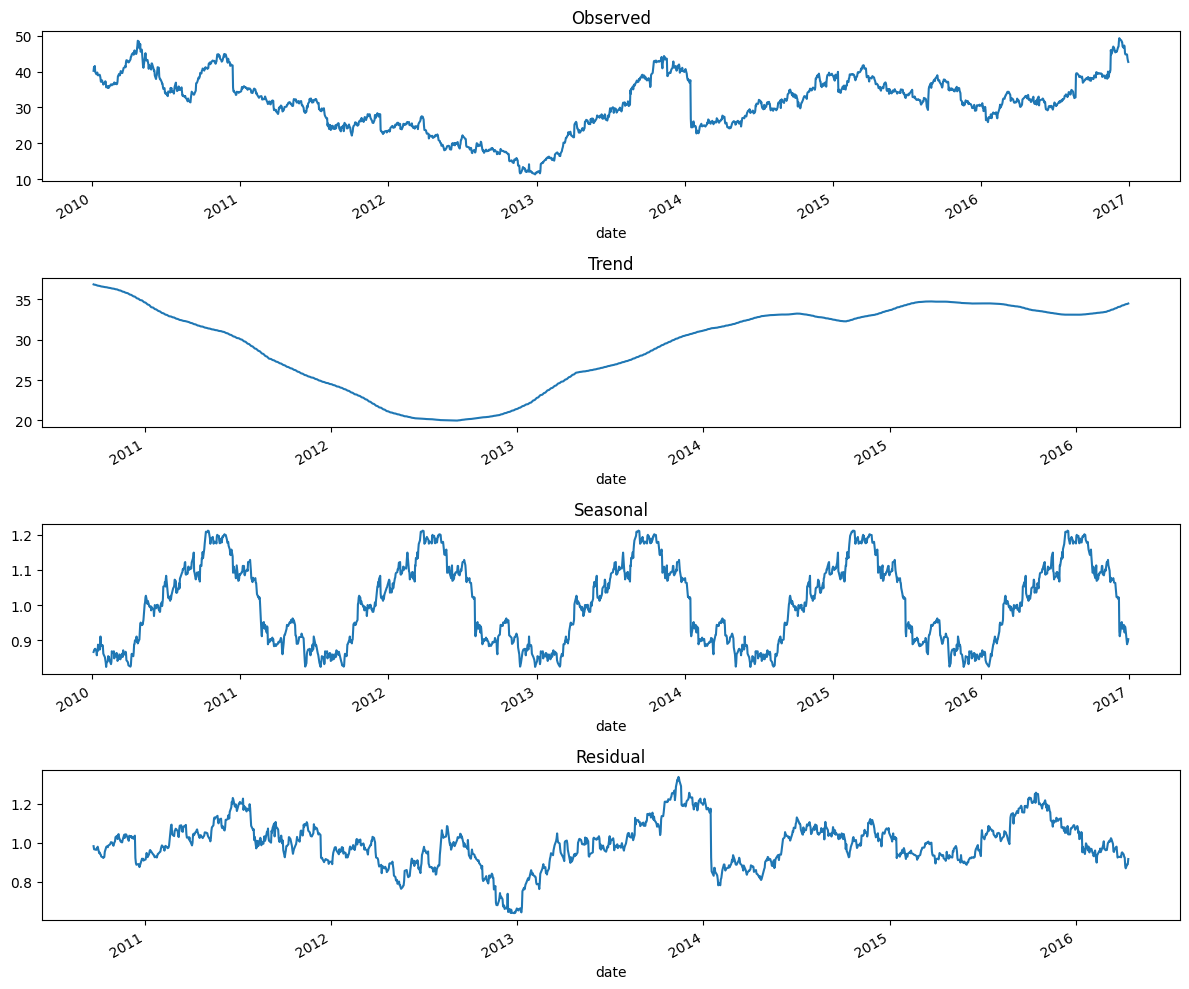

In [ ]:
#ChatGPT Seasonal Decop Attemp 1
#ChatGPT Seasonal Decop Attemp 1
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Check if 'date' column exists
print(BBY_df.columns)

# If 'date' is missing, assume the index is the date and reset it as a column
if 'date' not in BBY_df.columns:
    BBY_df['date'] = BBY_df.index  # Assuming the index is the date
    BBY_df.reset_index(drop=True, inplace=True)  # Reset the index if necessary

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Set 'date' as index
BBY_df.set_index('date', inplace=True)

# Now perform seasonal decomposition
# Perform the decomposition
result = seasonal_decompose(BBY_df['close'], model='multiplicative', period=365)

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
result.observed.plot(ax=ax1, title='Observed', legend=False)
result.trend.plot(ax=ax2, title='Trend', legend=False)
result.seasonal.plot(ax=ax3, title='Seasonal', legend=False)
result.resid.plot(ax=ax4, title='Residual', legend=False)
plt.tight_layout()
plt.show()


<ipython-input-12-256b6b0472a0>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  BBY_df_daily['close'] = BBY_df_daily['close'].fillna(method='ffill') # Fill missing values using forward fill


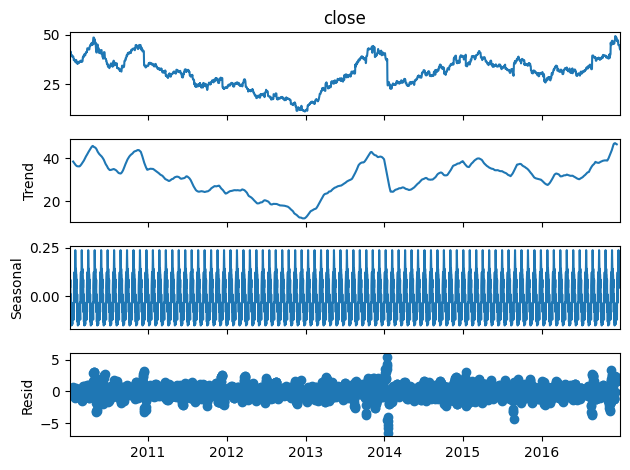

In [ ]:
#Human Try 1
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Assuming 'close' is the column you want to decompose
# Resample to daily frequency and fill missing values with forward fill
BBY_df_daily = BBY_df.resample('D').asfreq()  # Resample to daily frequency
BBY_df_daily['close'] = BBY_df_daily['close'].fillna(method='ffill') # Fill missing values using forward fill

result = seasonal_decompose(BBY_df_daily['close'], model='additive', period = 30)

# Plot the decomposed components
result.plot()
plt.show()

### ACF and PACF Data

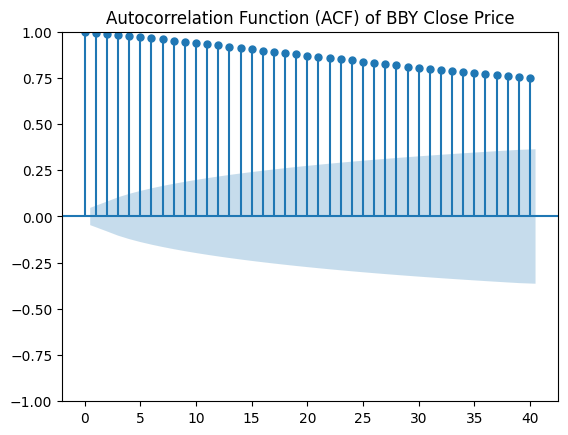

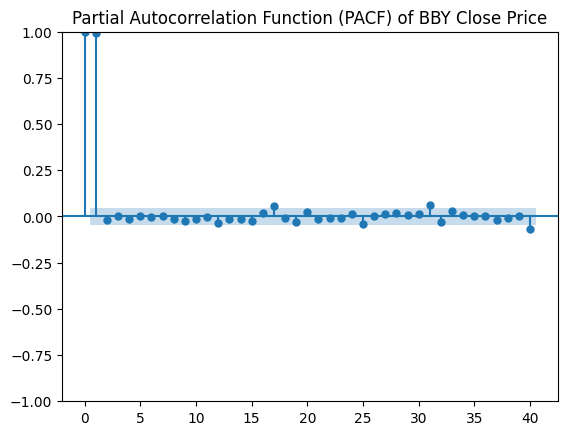

In [ ]:
# prompt: Create a ACF or PACF graph for BBY_df

import matplotlib.pyplot as plt  # Importing matplotlib for plotting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Importing ACF and PACF functions from statsmodels

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming BBY_df is already loaded and the 'close' column is the time series data
# Ensure that the index is a DatetimeIndex
BBY_df.index = pd.to_datetime(BBY_df.index)

# Plot ACF
plot_acf(BBY_df['close'], lags=40)  # You can adjust the number of lags
plt.title('Autocorrelation Function (ACF) of BBY Close Price')
plt.show()

# Plot PACF
plot_pacf(BBY_df['close'], lags=40)  # You can adjust the number of lags
plt.title('Partial Autocorrelation Function (PACF) of BBY Close Price')
plt.show()

<ipython-input-14-21e485f32f50>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df['close_diff'] = BBY_df['close'].diff()
<ipython-input-14-21e485f32f50>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df.dropna(subset=['close_diff'], inplace=True)


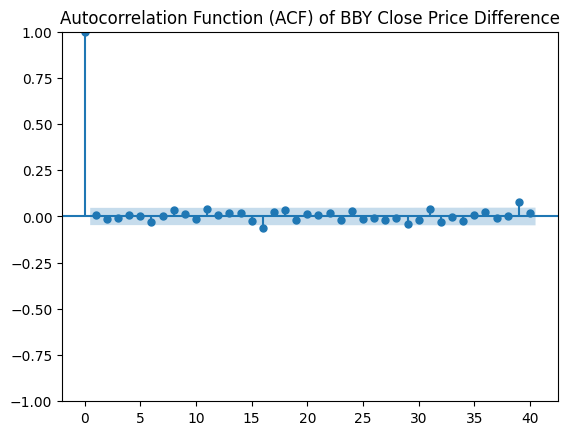

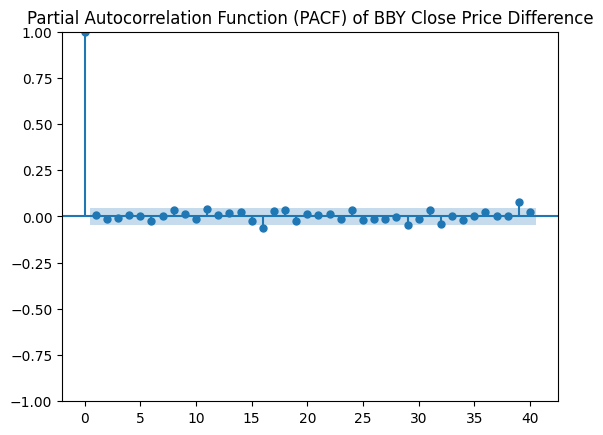

In [ ]:
# prompt: Create a ACF or PACF graph for BBY_df Using Today's value minus yesterday's value

# Assuming BBY_df is already loaded and the 'close' column is the time series data
# Ensure that the index is a DatetimeIndex
BBY_df.index = pd.to_datetime(BBY_df.index)

# Calculate the difference between today's value and yesterday's value
BBY_df['close_diff'] = BBY_df['close'].diff()

# Drop the first row as it will have a NaN value due to the difference calculation
BBY_df.dropna(subset=['close_diff'], inplace=True)

# Plot ACF
plot_acf(BBY_df['close_diff'], lags=40)  # You can adjust the number of lags
plt.title('Autocorrelation Function (ACF) of BBY Close Price Difference')
plt.show()

# Plot PACF
plot_pacf(BBY_df['close_diff'], lags=40)  # You can adjust the number of lags
plt.title('Partial Autocorrelation Function (PACF) of BBY Close Price Difference')
plt.show()

### CandleStick Data


In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import push_notebook
import pandas as pd

# Ensure the output will display in the notebook
output_notebook()

# Prepare data for candlestick chart
inc = BBY_df['close'] > BBY_df['open']  # When closing price is higher than opening
dec = BBY_df['open'] > BBY_df['close']  # When closing price is lower than opening
w = 12 * 60 * 60 * 1000  # width of the candlestick (in ms, for one day)

# Assuming the date information is in the index of the DataFrame
BBY_df['date'] = BBY_df.index

# Convert the 'date' column to datetime objects
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Create a ColumnDataSource
source = ColumnDataSource(data=dict(
    date=BBY_df['date'],
    open=BBY_df['open'],
    high=BBY_df['high'],
    low=BBY_df['low'],
    close=BBY_df['close'],
))

# Create a figure object
p = figure(x_axis_type="datetime", width=800, height=400, title="Candlestick Chart")

# Candlestick for increasing days
p.segment('date', 'high', 'date', 'low', source=source, color="black")
p.vbar('date', w, 'open', 'close', source=source, fill_color="green", line_color="black", legend_label="Rising")

# Candlestick for decreasing days
p.vbar('date', w, 'close', 'open', source=source, fill_color="red", line_color="black", legend_label="Falling")

# Add hover tool
hover = HoverTool()
hover.tooltips = [
    ("Date", "@date{%F}"),
    ("Open", "@open{$0.2f}"),
    ("High", "@high{$0.2f}"),
    ("Low", "@low{$0.2f}"),
    ("Close", "@close{$0.2f}")
]
hover.formatters = {"@date": "datetime"}
p.add_tools(hover)

# Customize labels and grid
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price (USD)'
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0.3

# Show the plot
show(p, notebook_handle=True)


<ipython-input-15-1d69cf789c07>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df['date'] = BBY_df.index
<ipython-input-15-1d69cf789c07>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df['date'] = pd.to_datetime(BBY_df['date'])


In [ ]:
#ChatGPT Attempt 2

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import push_notebook
import pandas as pd

# Ensure the output will display in the notebook
output_notebook()

# Prepare data for candlestick chart
inc = BBY_df['close'] > BBY_df['open']  # When closing price is higher than opening
dec = BBY_df['open'] > BBY_df['close']  # When closing price is lower than opening
w = 12 * 60 * 60 * 1000  # width of the candlestick (in ms, for one day)

# Assuming the date information is in the index of the DataFrame
BBY_df['date'] = BBY_df.index

# Convert the 'date' column to datetime objects
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Create ColumnDataSources for rising and falling days
source_inc = ColumnDataSource(data=dict(
    date=BBY_df['date'][inc],
    open=BBY_df['open'][inc],
    high=BBY_df['high'][inc],
    low=BBY_df['low'][inc],
    close=BBY_df['close'][inc],
))

source_dec = ColumnDataSource(data=dict(
    date=BBY_df['date'][dec],
    open=BBY_df['open'][dec],
    high=BBY_df['high'][dec],
    low=BBY_df['low'][dec],
    close=BBY_df['close'][dec],
))

# Create a figure object
p = figure(x_axis_type="datetime", width=800, height=400, title="Candlestick Chart")

# Candlestick for increasing days (green)
p.segment('date', 'high', 'date', 'low', source=source_inc, color="black")
p.vbar('date', w, 'open', 'close', source=source_inc, fill_color="green", line_color="black", legend_label="Rising")

# Candlestick for decreasing days (red)
p.segment('date', 'high', 'date', 'low', source=source_dec, color="black")
p.vbar('date', w, 'close', 'open', source=source_dec, fill_color="red", line_color="black", legend_label="Falling")

# Add hover tool
hover = HoverTool()
hover.tooltips = [
    ("Date", "@date{%F}"),
    ("Open", "@open{$0.2f}"),
    ("High", "@high{$0.2f}"),
    ("Low", "@low{$0.2f}"),
    ("Close", "@close{$0.2f}")
]
hover.formatters = {"@date": "datetime"}
p.add_tools(hover)

# Customize labels and grid
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price (USD)'
p.legend.location = "top_left"
p.grid.grid_line_alpha = 0.3

# Show the plot
show(p, notebook_handle=True)


<ipython-input-16-89a22bb3daff>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df['date'] = BBY_df.index
<ipython-input-16-89a22bb3daff>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df['date'] = pd.to_datetime(BBY_df['date'])


In [ ]:
#CHATGPT Attempt 2
import plotly.graph_objects as go
import pandas as pd

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=BBY_df['date'],
                open=BBY_df['open'],
                high=BBY_df['high'],
                low=BBY_df['low'],
                close=BBY_df['close'],
                increasing_line_color='green', decreasing_line_color='red')])

# Customize layout
fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False
)

# Show the figure
fig.show()


<ipython-input-17-0578b2d463bd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BBY_df['date'] = pd.to_datetime(BBY_df['date'])


In [ ]:
#ChatGPT Range Slider ON
import plotly.graph_objects as go
import pandas as pd

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=BBY_df['date'],
                open=BBY_df['open'],
                high=BBY_df['high'],
                low=BBY_df['low'],
                close=BBY_df['close'],
                increasing_line_color='green', decreasing_line_color='red')])

# Customize layout with range slider
fig.update_layout(
    title='Candlestick Chart with Range Slider',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True,  # Enable the range slider
    xaxis_rangeslider_thickness=0.2,  # Thickness of the slider
)

# Show the figure
fig.show()


<ipython-input-18-f1979f632246>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Attempt 3
import plotly.graph_objects as go
import pandas as pd

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Calculate moving averages
BBY_df['30_day_MA'] = BBY_df['close'].rolling(window=30).mean()
BBY_df['50_day_MA'] = BBY_df['close'].rolling(window=50).mean()

# Create the candlestick chart
fig = go.Figure(data=[
    go.Candlestick(
        x=BBY_df['date'],
        open=BBY_df['open'],
        high=BBY_df['high'],
        low=BBY_df['low'],
        close=BBY_df['close'],
        increasing_line_color='green',
        decreasing_line_color='red',
        name='Candlestick'
    ),
    go.Scatter(
        x=BBY_df['date'],
        y=BBY_df['30_day_MA'],
        mode='lines',
        name='30 Day MA',
        line=dict(color='blue', width=1)
    ),
    go.Scatter(
        x=BBY_df['date'],
        y=BBY_df['50_day_MA'],
        mode='lines',
        name='50 Day MA',
        line=dict(color='orange', width=1)
    )
])

# Add volume data as a bar chart
fig.add_trace(go.Bar(
    x=BBY_df['date'],
    y=BBY_df['volume'],
    name='Volume',
    marker_color='lightgrey',
    yaxis='y2',  # Use a secondary y-axis
    opacity=0.3  # Adjust opacity for better visibility
))

# Customize layout with range slider and secondary y-axis
fig.update_layout(
    title='Candlestick Chart with Moving Averages and Volume',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    yaxis2=dict(
        title='Volume',
        overlaying='y',
        side='right',
        showgrid=False  # Hide the grid for the secondary y-axis
    ),
    xaxis_rangeslider_visible=True,  # Enable the range slider
    xaxis_rangeslider_thickness=0.2,  # Thickness of the slider
)

# Show the figure
fig.show()


<ipython-input-19-57dc6b3fc4de>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-57dc6b3fc4de>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-57dc6b3fc4de>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Attempt 4
import plotly.graph_objects as go
import pandas as pd

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Calculate moving averages
BBY_df['30_day_MA'] = BBY_df['close'].rolling(window=30).mean()
BBY_df['50_day_MA'] = BBY_df['close'].rolling(window=50).mean()

# Create the candlestick chart
fig = go.Figure(data=[
    go.Candlestick(
        x=BBY_df['date'],
        open=BBY_df['open'],
        high=BBY_df['high'],
        low=BBY_df['low'],
        close=BBY_df['close'],
        increasing_line_color='green',
        decreasing_line_color='red',
        name='Candlestick',
        hoverinfo='text',  # Use text for hover info
        customdata=BBY_df[['30_day_MA', '50_day_MA', 'volume']],  # Add moving averages and volume
    )
])

# Add moving averages as scatter lines
fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['30_day_MA'],
    mode='lines',
    name='30 Day MA',
    line=dict(color='blue', width=1),
    hoverinfo='none'  # Disable hover for moving average lines
))

fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['50_day_MA'],
    mode='lines',
    name='50 Day MA',
    line=dict(color='orange', width=1),
    hoverinfo='none'  # Disable hover for moving average lines
))

# Add volume data as a bar chart
fig.add_trace(go.Bar(
    x=BBY_df['date'],
    y=BBY_df['volume'],
    name='Volume',
    marker_color='lightgrey',
    yaxis='y2',  # Use a secondary y-axis
    opacity=0.3,
    hoverinfo='text',  # Use text for hover info
    customdata=BBY_df['volume'],  # Add volume data for hover
))

# Customize layout with range slider and secondary y-axis
fig.update_layout(
    title='Candlestick Chart with Moving Averages and Volume',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    yaxis2=dict(
        title='Volume',
        overlaying='y',
        side='right',
        showgrid=False  # Hide the grid for the secondary y-axis
    ),
    xaxis_rangeslider_visible=True,  # Enable the range slider
    xaxis_rangeslider_thickness=0.1,  # Thickness of the slider
)

# Update hover information for the candlestick
fig.for_each_trace(lambda trace: trace.update(
    hovertext='Date: %{x}<br>' +
                  'Open: %{open:.2f}<br>' +
                  'High: %{high:.2f}<br>' +
                  'Low: %{low:.2f}<br>' +
                  'Close: %{close:.2f}<br>' +
                  '30 Day MA: %{customdata[0]:.2f}<br>' +
                  '50 Day MA: %{customdata[1]:.2f}<br>' +
                  'Volume: %{customdata[2]:,.0f}<br>' +
                  '<extra></extra>'
))

# Show the figure
fig.show()



<ipython-input-20-4b77cc703dbe>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-4b77cc703dbe>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-4b77cc703dbe>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Calculate moving averages
BBY_df['30_day_MA'] = BBY_df['close'].rolling(window=30).mean()
BBY_df['50_day_MA'] = BBY_df['close'].rolling(window=50).mean()

# Create the candlestick chart
fig = go.Figure(data=[
    go.Candlestick(
        x=BBY_df['date'],
        open=BBY_df['open'],
        high=BBY_df['high'],
        low=BBY_df['low'],
        close=BBY_df['close'],
        increasing_line_color='green',
        decreasing_line_color='red',
        name='Candlestick',
        hoverinfo='text',  # Use text for hover info
        hovertext=BBY_df.apply(
            lambda row: (
                f'Date: {row["date"].date()}<br>' +
                f'Open: {row["open"]:.2f}<br>' +
                f'High: {row["high"]:.2f}<br>' +
                f'Low: {row["low"]:.2f}<br>' +
                f'Close: {row["close"]:.2f}<br>' +
                f'30 Day MA: {row["30_day_MA"]:.2f}<br>' +
                f'50 Day MA: {row["50_day_MA"]:.2f}<br>' +
                f'Volume: {row["volume"]:,}<br>'
            ),
            axis=1
        ).tolist()  # Create a list of hover text for each row
    )
])

# Add moving averages as scatter lines
fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['30_day_MA'],
    mode='lines',
    name='30 Day MA',
    line=dict(color='blue', width=1),
    hoverinfo='none'  # Disable hover for moving average lines
))

fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['50_day_MA'],
    mode='lines',
    name='50 Day MA',
    line=dict(color='orange', width=1),
    hoverinfo='none'  # Disable hover for moving average lines
))

# Add volume data as a bar chart
fig.add_trace(go.Bar(
    x=BBY_df['date'],
    y=BBY_df['volume'],
    name='Volume',
    marker_color='rgba(64, 64, 255, 0.9)',  # Change color for better visibility
    yaxis='y2',  # Use a secondary y-axis
    opacity=0.6,  # Increase opacity for better visibility
    hoverinfo='text',  # Use text for hover info
    hovertext=BBY_df['volume'].apply(lambda vol: f'Volume: {vol:,}').tolist()  # Volume hover text
))

# Customize layout with range slider and secondary y-axis
fig.update_layout(
    title='Candlestick Chart with Moving Averages and Volume',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    yaxis2=dict(
        title='Volume',
        overlaying='y',
        side='right',
        showgrid=False  # Hide the grid for the secondary y-axis
    ),
    xaxis_rangeslider_visible=True,  # Enable the range slider
    xaxis_rangeslider_thickness=0.1,  # Thickness of the slider
)

# Show the figure
fig.show()



<ipython-input-21-bbeccfb45cca>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-bbeccfb45cca>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-21-bbeccfb45cca>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#ChatGPT With Annotations
import plotly.graph_objects as go
import pandas as pd

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Calculate moving averages
BBY_df['30_day_MA'] = BBY_df['close'].rolling(window=30).mean()
BBY_df['50_day_MA'] = BBY_df['close'].rolling(window=50).mean()

# Create the candlestick chart
fig = go.Figure(data=[
    go.Candlestick(
        x=BBY_df['date'],
        open=BBY_df['open'],
        high=BBY_df['high'],
        low=BBY_df['low'],
        close=BBY_df['close'],
        increasing_line_color='green',
        decreasing_line_color='red',
        name='Candlestick',
        hoverinfo='text',  # Use text for hover info
        hovertext=BBY_df.apply(
            lambda row: (
                f'Date: {row["date"].date()}<br>' +
                f'Open: {row["open"]:.2f}<br>' +
                f'High: {row["high"]:.2f}<br>' +
                f'Low: {row["low"]:.2f}<br>' +
                f'Close: {row["close"]:.2f}<br>' +
                f'30 Day MA: {row["30_day_MA"]:.2f}<br>' +
                f'50 Day MA: {row["50_day_MA"]:.2f}<br>' +
                f'Volume: {row["volume"]:,}<br>'
            ),
            axis=1
        ).tolist()  # Create a list of hover text for each row
    )
])

# Add moving averages as scatter lines
fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['30_day_MA'],
    mode='lines',
    name='30 Day MA',
    line=dict(color='blue', width=1),
    hoverinfo='none'  # Disable hover for moving average lines
))

fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['50_day_MA'],
    mode='lines',
    name='50 Day MA',
    line=dict(color='orange', width=1),
    hoverinfo='none'  # Disable hover for moving average lines
))

# Add volume data as a bar chart
fig.add_trace(go.Bar(
    x=BBY_df['date'],
    y=BBY_df['volume'],
    name='Volume',
    marker_color='rgba(64, 64, 255, 0.9)',  # Change color for better visibility
    yaxis='y2',  # Use a secondary y-axis
    opacity=0.6,  # Increase opacity for better visibility
    hoverinfo='text',  # Use text for hover info
    hovertext=BBY_df['volume'].apply(lambda vol: f'Volume: {vol:,}').tolist()  # Volume hover text
))

# Define events and check for existence in the DataFrame
events = [
    {'date': '2012-04-10', 'text': 'Brian Dunn Resigned'},
    {'date': '2013-01-15', 'text': "CEO Hubert Joly's Turnaround Plan Started"},
    {'date': '2014-01-15', 'text': 'Poor Q4 Earnings Report'}
]

annotations = []
for event in events:
    date = pd.to_datetime(event['date'])
    # Check if the date exists in the DataFrame
    if date in BBY_df['date'].values:
        # Get the closing price on the event date
        y_value = BBY_df.loc[BBY_df['date'] == date, 'close'].values[0]
        annotations.append(dict(
            x=date,
            y=y_value,
            text=event['text'],
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-40,  # Offset to position the text above the arrow
            bgcolor='lightyellow',
            bordercolor='black',
            borderwidth=1,
        ))

# Customize layout with range slider and secondary y-axis
fig.update_layout(
    title='Candlestick Chart with Moving Averages and Volume',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    yaxis2=dict(
        title='Volume',
        overlaying='y',
        side='right',
        showgrid=False  # Hide the grid for the secondary y-axis
    ),
    xaxis_rangeslider_visible=True,  # Enable the range slider
    xaxis_rangeslider_thickness=0.1,  # Thickness of the slider
    annotations=annotations  # Add annotations to the layout
)

# Show the figure with annotations
fig.show()



<ipython-input-22-dfee2afc0789>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-dfee2afc0789>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-dfee2afc0789>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Assuming your DataFrame has a column named 'Date' instead of 'date'
# Rename the 'Date' column to 'date'
BBY_df = BBY_df.rename(columns={'Date': 'date'})

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Calculate moving averages
BBY_df['30_day_MA'] = BBY_df['close'].rolling(window=30).mean()
BBY_df['50_day_MA'] = BBY_df['close'].rolling(window=50).mean()

# ... (Rest of your code remains the same) ...

# Create the candlestick chart
fig = go.Figure(data=[
    go.Candlestick(
        x=BBY_df['date'],
        open=BBY_df['open'],
        high=BBY_df['high'],
        low=BBY_df['low'],
        close=BBY_df['close'],
        increasing_line_color='green',
        decreasing_line_color='red',
        name='Candlestick',
        hoverinfo='text',  # Use text for hover info
        hovertext=BBY_df.apply(
            lambda row: (
                f'Date: {row["date"].date()}<br>' +
                f'Open: {row["open"]:.2f}<br>' +
                f'High: {row["high"]:.2f}<br>' +
                f'Low: {row["low"]:.2f}<br>' +
                f'Close: {row["close"]:.2f}<br>' +
                f'30 Day MA: {row["30_day_MA"]:.2f}<br>' +
                f'50 Day MA: {row["50_day_MA"]:.2f}<br>' +
                f'Volume: {row["volume"]:,}<br>'
            ),
            axis=1
        ).tolist()  # Create a list of hover text for each row
    )
])

# Add moving averages as scatter lines
fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['30_day_MA'],
    mode='lines',
    name='30 Day MA',
    line=dict(color='blue', width=1),
    hoverinfo='none'  # Disable hover for moving average lines
))

fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['50_day_MA'],
    mode='lines',
    name='50 Day MA',
    line=dict(color='orange', width=1),
    hoverinfo='none'  # Disable hover for moving average lines
))

# Add volume data as a bar chart
fig.add_trace(go.Bar(
    x=BBY_df['date'],
    y=BBY_df['volume'],
    name='Volume',
    marker_color='rgba(64, 64, 255, 0.9)',  # Change color for better visibility
    yaxis='y2',  # Use a secondary y-axis
    opacity=0.6,  # Increase opacity for better visibility
    hoverinfo='text',  # Use text for hover info
    hovertext=BBY_df['volume'].apply(lambda vol: f'Volume: {vol:,}').tolist()  # Volume hover text
))

# Define events including the new annotations
events = [
    {'date': '2010-12-14', 'text': 'Poor Holiday Earnings'},
    {'date': '2012-04-10', 'text': 'Brian Dunn Resigned'},
    {'date': '2013-01-01', 'text': "CEO Hubert Joly's Turnaround Plan Started"},
    {'date': '2013-01-02', 'text': "CEO Hubert Joly's Turnaround Plan Started"},
    {'date': '2014-01-15', 'text': 'Poor Q4 Earnings Report'},
    {'date': '2016-08-23', 'text': 'Good Q2 Earnings'},
    {'date': '2016-11-17', 'text': 'Good Q3 Earnings'}
]

annotations = []
for event in events:
    date = pd.to_datetime(event['date'])
    # Check if the date exists in the DataFrame
    if date in BBY_df['date'].values:
        # Get the closing price on the event date
        y_value = BBY_df.loc[BBY_df['date'] == date, 'close'].values[0]
        annotations.append(dict(
            x=date,
            y=y_value,
            text=event['text'],
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-40,  # Offset to position the text above the arrow
            bgcolor='lightyellow',
            bordercolor='black',
            borderwidth=1,
        ))

# Customize layout with range slider and secondary y-axis
fig.update_layout(
    title='Candlestick Chart with Moving Averages and Volume',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    yaxis2=dict(
        title='Volume',
        overlaying='y',
        side='right',
        showgrid=False  # Hide the grid for the secondary y-axis
    ),
    xaxis_rangeslider_visible=True,  # Enable the range slider
    xaxis_rangeslider_thickness=0.1,  # Thickness of the slider
    annotations=annotations  # Add annotations to the layout
)

# Show the figure with annotations
fig.show()


### Forecasts



In [ ]:
# prompt: Create a Time-Series graph with different forecasts for close value of BBY_df. Label the Forecasts

# Assuming you have your forecasts stored in variables like 'forecast_arima', 'forecast_prophet', etc.
# Replace these with your actual forecast dataframes.

# Example forecast dataframes (replace with your actual forecasts)
forecast_arima = pd.DataFrame({'date': BBY_df.index[-10:], 'forecast': BBY_df['close'].iloc[-10:] + 10})
forecast_prophet = pd.DataFrame({'date': BBY_df.index[-10:], 'forecast': BBY_df['close'].iloc[-10:] + 20})
forecast_lstm = pd.DataFrame({'date': BBY_df.index[-10:], 'forecast': BBY_df['close'].iloc[-10:] + 30})

# Ensure 'date' column is in datetime format
forecast_arima['date'] = pd.to_datetime(forecast_arima['date'])
forecast_prophet['date'] = pd.to_datetime(forecast_prophet['date'])
forecast_lstm['date'] = pd.to_datetime(forecast_lstm['date'])

# Create the figure
fig = go.Figure()

# Add the actual close price data
fig.add_trace(go.Scatter(x=BBY_df.index, y=BBY_df['close'], mode='lines', name='Actual Close'))

# Add the forecasts
fig.add_trace(go.Scatter(x=forecast_arima['date'], y=forecast_arima['forecast'], mode='lines', name='ARIMA Forecast'))
fig.add_trace(go.Scatter(x=forecast_prophet['date'], y=forecast_prophet['forecast'], mode='lines', name='Prophet Forecast'))
fig.add_trace(go.Scatter(x=forecast_lstm['date'], y=forecast_lstm['forecast'], mode='lines', name='LSTM Forecast'))

# Customize the layout
fig.update_layout(
    title='BBY Close Price with Forecasts',
    xaxis_title='Date',
    yaxis_title='Close Price',
    hovermode='x'
)

# Show the figure
fig.show()

In [ ]:
#ChatGPT First Try
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Generate dummy forecasts for demonstration
# Forecast 1: Simple extension of last value
forecast_1 = BBY_df['close'].iloc[-1] + np.cumsum(np.random.randn(len(BBY_df)) * 0.5)
forecast_2 = BBY_df['close'].iloc[-1] + np.cumsum(np.random.randn(len(BBY_df)) * 0.3)

# Create the figure
fig = go.Figure()

# Plot the actual close prices
fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['close'],
    mode='lines',
    name='Actual Close Price',
    line=dict(color='blue'),
    hoverinfo='x+y'
))

# Add forecast 1
fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=forecast_1,
    mode='lines',
    name='Forecast 1 (Random Walk)',
    line=dict(color='red', dash='dash'),
    hoverinfo='x+y'
))

# Add forecast 2
fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=forecast_2,
    mode='lines',
    name='Forecast 2 (Smoother)',
    line=dict(color='green', dash='dot'),
    hoverinfo='x+y'
))

# Customize layout
fig.update_layout(
    title='BBY Time Series with Forecasts',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True  # Enable the range slider
)

# Show the figure
fig.show()


In [ ]:
#ChatGPT Graph attempt 2
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Set the forecast horizon - end of 2018
forecast_horizon = pd.date_range(start=BBY_df['date'].iloc[-1], end='2018-12-31', freq='B')  # Business days

# Forecast 1: Simple Moving Average (30 days)
BBY_df['30_day_MA'] = BBY_df['close'].rolling(window=30).mean()
forecast_1 = np.full(len(forecast_horizon), BBY_df['30_day_MA'].iloc[-1])  # Extend last MA value

# Forecast 2: Linear Trend Forecast
# Fit a linear trend (slope and intercept) on the original data
days_since_start = (BBY_df['date'] - BBY_df['date'].min()).dt.days
slope, intercept = np.polyfit(days_since_start, BBY_df['close'], 1)
forecast_2 = slope * (forecast_horizon - BBY_df['date'].min()).days + intercept

# Forecast 3: Exponential Smoothing (alpha=0.3)
BBY_df['exp_smooth'] = BBY_df['close'].ewm(alpha=0.3).mean()
forecast_3 = np.full(len(forecast_horizon), BBY_df['exp_smooth'].iloc[-1])  # Extend last exp_smooth value

# Create the figure
fig = go.Figure()

# Plot the actual close prices
fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['close'],
    mode='lines',
    name='Actual Close Price',
    line=dict(color='blue'),
    hoverinfo='x+y'
))

# Plot forecast 1: Moving Average Forecast
fig.add_trace(go.Scatter(
    x=forecast_horizon,
    y=forecast_1,
    mode='lines',
    name='Forecast 1: 30 Day MA',
    line=dict(color='orange', dash='dash'),
    hoverinfo='x+y'
))

# Plot forecast 2: Linear Trend Forecast
fig.add_trace(go.Scatter(
    x=forecast_horizon,
    y=forecast_2,
    mode='lines',
    name='Forecast 2: Linear Trend',
    line=dict(color='green', dash='dot'),
    hoverinfo='x+y'
))

# Plot forecast 3: Exponential Smoothing Forecast
fig.add_trace(go.Scatter(
    x=forecast_horizon,
    y=forecast_3,
    mode='lines',
    name='Forecast 3: Exponential Smoothing',
    line=dict(color='red', dash='dot'),
    hoverinfo='x+y'
))

# Customize layout
fig.update_layout(
    title='BBY Time Series with Forecasts (Extended to End of 2018)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True,  # Enable the range slider
    showlegend=True
)

# Show the figure
fig.show()


In [ ]:
!pip install prophet


In [ ]:
#ChatGPT Graph 3
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet  # Updated import for 'prophet'


# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Set the forecast horizon - end of 2018
forecast_horizon = pd.date_range(start=BBY_df['date'].iloc[-1], end='2018-12-31', freq='B')  # Business days

# Forecast 1: Linear Trend Forecast
# Fit a linear trend (slope and intercept) on the original data
days_since_start = (BBY_df['date'] - BBY_df['date'].min()).dt.days
slope, intercept = np.polyfit(days_since_start, BBY_df['close'], 1)
forecast_linear = slope * (forecast_horizon - BBY_df['date'].min()).days + intercept

# Forecast 2: ARIMA Forecast
# Fit an ARIMA model and generate forecast
arima_model = ARIMA(BBY_df['close'], order=(30, 2, 10))  # Adjust ARIMA order as needed
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(forecast_horizon))

# Forecast 3: Prophet Forecast
# Prepare data for Prophet
prophet_df = BBY_df[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future_dates = pd.DataFrame({'ds': forecast_horizon})
prophet_forecast = prophet_model.predict(future_dates)['yhat']

# Create the figure
fig = go.Figure()

# Plot the actual close prices
fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['close'],
    mode='lines',
    name='Actual Close Price',
    line=dict(color='blue'),
    hoverinfo='x+y'
))

# Plot forecast 1: Linear Trend Forecast
fig.add_trace(go.Scatter(
    x=forecast_horizon,
    y=forecast_linear,
    mode='lines',
    name='Forecast 1: Linear Trend',
    line=dict(color='orange', dash='dash'),
    hoverinfo='x+y'
))

# Plot forecast 2: ARIMA Forecast
fig.add_trace(go.Scatter(
    x=forecast_horizon,
    y=arima_forecast,
    mode='lines',
    name='Forecast 2: ARIMA',
    line=dict(color='green', dash='dot'),
    hoverinfo='x+y'
))

# Plot forecast 3: Prophet Forecast
fig.add_trace(go.Scatter(
    x=forecast_horizon,
    y=prophet_forecast,
    mode='lines',
    name='Forecast 3: Prophet',
    line=dict(color='red', dash='dot'),
    hoverinfo='x+y'
))

# Customize layout
fig.update_layout(
    title='BBY Time Series with Advanced Forecasts (Extended to End of 2018)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True,  # Enable the range slider
    showlegend=True
)

# Show the figure
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

In [ ]:
#Chat GPT Attempt 5
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet  # Updated import for Prophet

# Ensure 'date' column is in datetime format
BBY_df['date'] = pd.to_datetime(BBY_df['date'])

# Set the forecast horizon - end of 2018
forecast_horizon = pd.date_range(start=BBY_df['date'].iloc[-1], end='2018-12-31', freq='B')  # Business days

# Forecast 1: Linear Trend Forecast
# Fit a linear trend (slope and intercept) on the original data
days_since_start = (BBY_df['date'] - BBY_df['date'].min()).dt.days
slope, intercept = np.polyfit(days_since_start, BBY_df['close'], 1)
forecast_linear = slope * (forecast_horizon - BBY_df['date'].min()).days + intercept

# Forecast 2: SARIMA Forecast (with seasonal order)
# Fit a SARIMA model and generate forecast
# Adjust the seasonal_order (P, D, Q, m) depending on your data's seasonality
sarima_model = SARIMAX(BBY_df['close'], order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))  # SARIMA(5,1,0)x(1,1,1,12)
sarima_fit = sarima_model.fit()
sarima_forecast = sarima_fit.forecast(steps=len(forecast_horizon))

# Forecast 3: Prophet Forecast
# Prepare data for Prophet
prophet_df = BBY_df[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future_dates = pd.DataFrame({'ds': forecast_horizon})
prophet_forecast = prophet_model.predict(future_dates)['yhat']

# Create the figure
fig = go.Figure()

# Plot the actual close prices
fig.add_trace(go.Scatter(
    x=BBY_df['date'],
    y=BBY_df['close'],
    mode='lines',
    name='Actual Close Price',
    line=dict(color='blue'),
    hoverinfo='x+y'
))

# Plot forecast 1: Linear Trend Forecast
fig.add_trace(go.Scatter(
    x=forecast_horizon,
    y=forecast_linear,
    mode='lines',
    name='Forecast 1: Linear Trend',
    line=dict(color='orange', dash='dash'),
    hoverinfo='x+y'
))

# Plot forecast 2: SARIMA Forecast
fig.add_trace(go.Scatter(
    x=forecast_horizon,
    y=sarima_forecast,
    mode='lines',
    name='Forecast 2: SARIMA',
    line=dict(color='green', dash='dot'),
    hoverinfo='x+y'
))

# Plot forecast 3: Prophet Forecast
fig.add_trace(go.Scatter(
    x=forecast_horizon,
    y=prophet_forecast,
    mode='lines',
    name='Forecast 3: Prophet',
    line=dict(color='red', dash='dot'),
    hoverinfo='x+y'
))

# Customize layout
fig.update_layout(
    title='BBY Time Series with SARIMA and Prophet Forecasts (Extended to End of 2018)',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=True,  # Enable the range slider
    showlegend=True
)

# Show the figure
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:inp

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



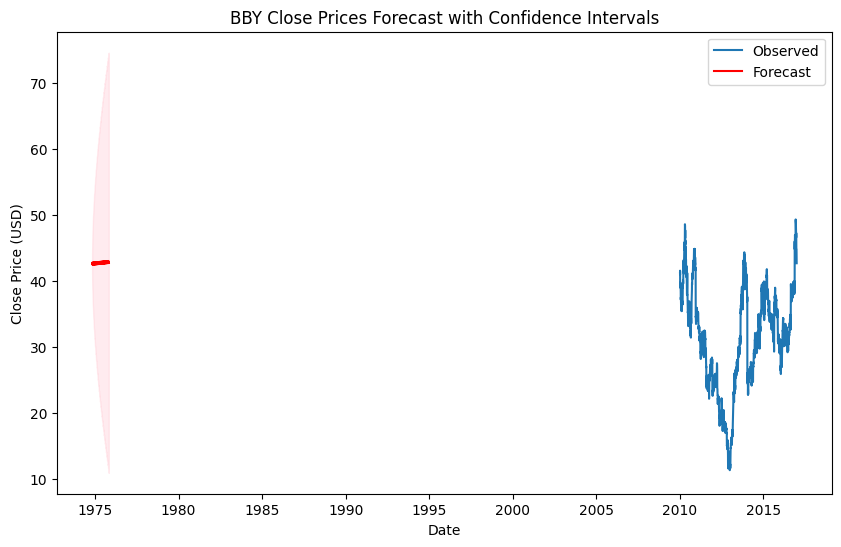

In [ ]:
#ChatGPT Take 2
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming BBY_df is your DataFrame and the 'date' column is datetime-formatted
BBY_df['date'] = pd.to_datetime(BBY_df['date'])
BBY_df.set_index('date', inplace=True)

# Step 1: Define and fit the SARIMA model
model = SARIMAX(BBY_df['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# Step 2: Forecast for the next 365 days (1 year)
forecast = result.get_forecast(steps=365)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Step 3: Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(BBY_df.index, BBY_df['close'], label='Observed')
plt.plot(mean_forecast.index, mean_forecast, color='r', label='Forecast')

# Plot confidence intervals
plt.fill_between(mean_forecast.index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)

plt.title('BBY Close Prices Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



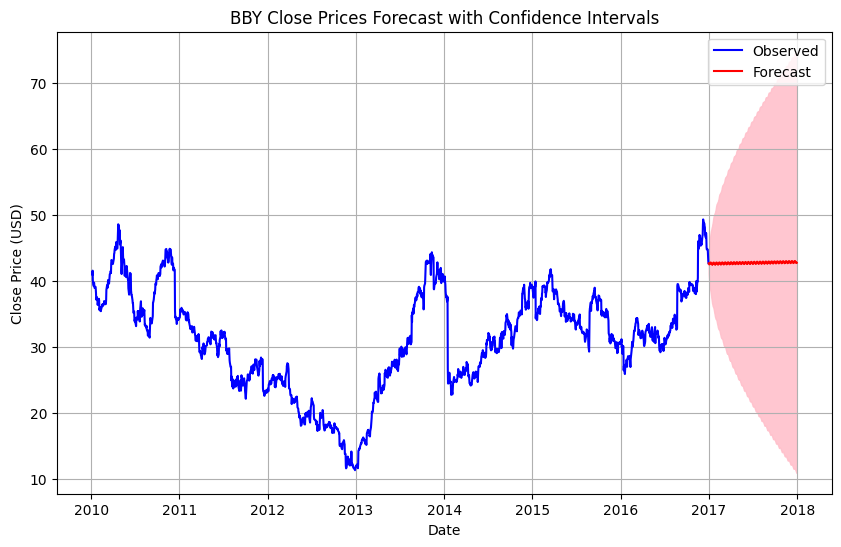

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Inspect the data to identify the date column
# BBY_df.head()  # Uncomment this line if you need to visually inspect the dataframe

# Step 2: Check if the date column is labeled differently (example: Unnamed: 0 or another name)
if 'Unnamed: 0' in BBY_df.columns:
    BBY_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Step 3: Ensure 'date' column is in datetime format and set as index

# Step 4: Fit SARIMA model (or ARIMA if no seasonal component is needed)
model = SARIMAX(BBY_df['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
result = model.fit()

# Step 3: Forecast for the next year (365 days from the last date in the data)
forecast = result.get_forecast(steps=365)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Step 4: Get the index for the forecast (starting from the last date)
last_date = BBY_df.index[-1]  # Last date in the dataset
forecast_index = pd.date_range(start=last_date, periods=365+1, freq='D')[1:]  # 365 days starting from the next day

# Step 5: Plot original data and forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(BBY_df.index, BBY_df['close'], label='Observed', color='blue')
plt.plot(forecast_index, mean_forecast, color='red', label='Forecast')

# Plot confidence intervals
plt.fill_between(forecast_index,
                 confidence_intervals.iloc[:, 0],
                 confidence_intervals.iloc[:, 1], color='pink', alpha=0.9)

# Customize the plot
plt.title('BBY Close Prices Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
BBY_df.head()

symbol       open      close        low       high      volume  \
date                                                                        
2010-01-05    BBY  40.540001  41.209999  40.500000  41.500000   6979200.0   
2010-01-06    BBY  41.209999  40.889999  40.660000  41.340000   4192500.0   
2010-01-07    BBY  40.799999  41.540001  40.700001  41.590000   8762000.0   
2010-01-08    BBY  40.639999  39.910000  39.750000  40.860001  14177900.0   
2010-01-11    BBY  40.040001  39.230000  39.000000  40.040001   9568900.0   

           Ticker symbol           Security SEC filings  \
date                                                      
2010-01-05           BBY  Best Buy Co. Inc.     reports   
2010-01-06           BBY  Best Buy Co. Inc.     reports   
2010-01-07           BBY  Best Buy Co. Inc.     reports   
2010-01-08           BBY  Best Buy Co. Inc.     reports   
2010-01-11           BBY  Best Buy Co. Inc.     reports   

                       GICS Sector              GICS Sub Industry  \
date                                                                
2010-01-05  Consumer Discretionary  Computer & Electronics Retail   
2010-01-06  Consumer Discretionary  Computer & Electronics Retail   
2010-01-07  Consumer Discretionary  Computer & Electronics Retail   
2010-01-08  Consumer Discretionary  Computer & Electronics Retail   
2010-01-11  Consumer Discretionary  Computer & Electronics Retail   

           Address of Headquarters Date first added     CIK  30_day_MA  \
date                                                                     
2010-01-05    Richfield, Minnesota              NaN  764478        NaN   
2010-01-06    Richfield, Minnesota              NaN  764478        NaN   
2010-01-07    Richfield, Minnesota              NaN  764478        NaN   
2010-01-08    Richfield, Minnesota              NaN  764478        NaN   
2010-01-11    Richfield, Minnesota              NaN  764478        NaN   

            close_diff  50_day_MA  exp_smooth  
date                                           
2010-01-05    1.020000        NaN   41.209999  
2010-01-06   -0.320000        NaN   41.021764  
2010-01-07    0.650002        NaN   41.258402  
2010-01-08   -1.630001        NaN   40.726068  
2010-01-11   -0.680000        NaN   40.186575

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Inspect the data to identify the date column
# BBY_df.head()  # Uncomment this line if you need to visually inspect the dataframe

# Step 2: Check if the date column is labeled differently (example: Unnamed: 0 or another name)
if 'Unnamed: 0' in BBY_df.columns:
    BBY_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Step 3: Ensure 'date' column is in datetime format and set as index
if 'date' in BBY_df.columns:
    BBY_df['date'] = pd.to_datetime(BBY_df['date'])
    BBY_df.set_index('date', inplace=True)

# Step 4: Fit SARIMA model
#sarima_model = SARIMAX(BBY_df['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
#sarima_result = sarima_model.fit()

# Step 5: Forecast for the next year (365 days from the last date in the data) using SARIMA
sarima_forecast = sarima_result.get_forecast(steps=365)
sarima_mean_forecast = sarima_forecast.predicted_mean
sarima_confidence_intervals = sarima_forecast.conf_int()

# Step 6: Fit ARIMA model
arima_model = ARIMA(BBY_df['close'], order=(1, 1, 1))  # Example ARIMA model without seasonal component
arima_result = arima_model.fit()

# Step 7: Forecast for the next year (365 days from the last date in the data) using ARIMA
arima_forecast = arima_result.get_forecast(steps=365)
arima_mean_forecast = arima_forecast.predicted_mean
arima_confidence_intervals = arima_forecast.conf_int()

# Step 8: Get the index for the forecast (starting from the last date)
last_date = BBY_df.index[-1]  # Last date in the dataset
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365, freq='D')  # 365 days starting from the next day

# Step 9: Plot original data, SARIMA forecast, and ARIMA forecast with confidence intervals
plt.figure(figsize=(12, 8))

# Plot observed data
plt.plot(BBY_df.index, BBY_df['close'], label='Observed', color='blue')

# Plot SARIMA forecast
plt.plot(forecast_index, sarima_mean_forecast, color='red', label='SARIMA Forecast')
plt.fill_between(forecast_index,
                 sarima_confidence_intervals.iloc[:, 0],
                 sarima_confidence_intervals.iloc[:, 1], color='pink', alpha=0.4, label='SARIMA CI')

# Plot ARIMA forecast
plt.plot(forecast_index, arima_mean_forecast, color='green', label='ARIMA Forecast')
plt.fill_between(forecast_index,
                 arima_confidence_intervals.iloc[:, 0],
                 arima_confidence_intervals.iloc[:, 1], color='lightblue', alpha=0.4, label='ARIMA CI')

# Customize the plot
plt.title('BBY Close Prices Forecast with SARIMA and ARIMA Models')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'sarima_result' is not defined

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keywo

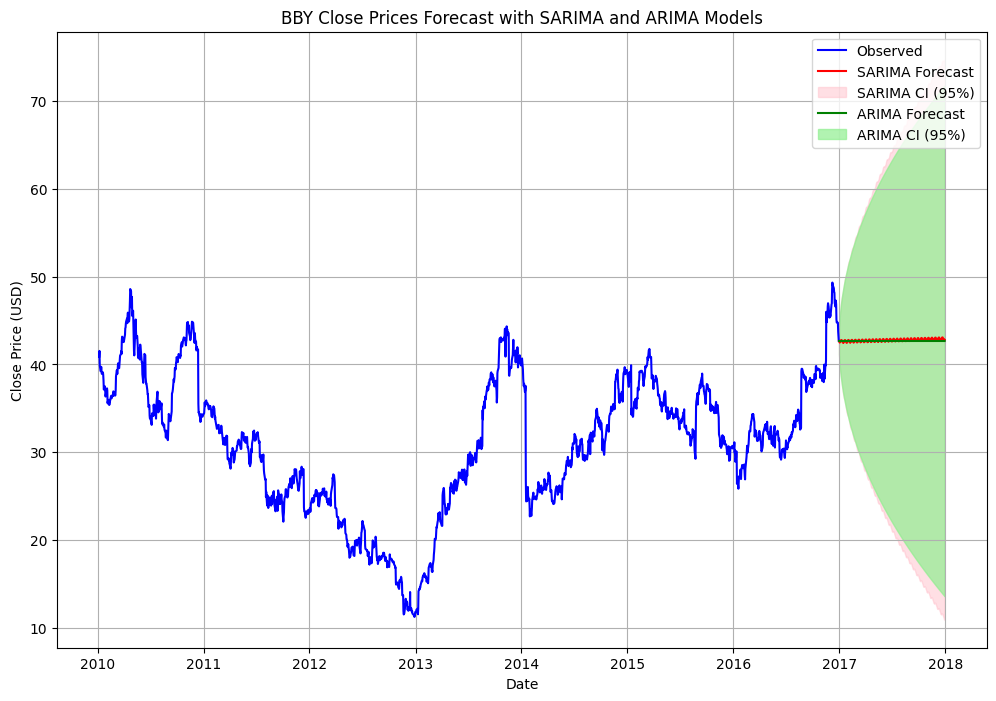

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

# Step 1: Inspect the data to identify the date column
# BBY_df.head()  # Uncomment this line if you need to visually inspect the dataframe

# Step 2: Check if the date column is labeled differently (example: Unnamed: 0 or another name)
if 'Unnamed: 0' in BBY_df.columns:
    BBY_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Step 3: Ensure 'date' column is in datetime format and set as index
if 'date' in BBY_df.columns:
    BBY_df['date'] = pd.to_datetime(BBY_df['date'])
    BBY_df.set_index('date', inplace=True)

# Step 4: Fit SARIMA model
sarima_model = SARIMAX(BBY_df['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Step 5: Forecast for the next year (365 days from the last date in the data) using SARIMA
sarima_forecast = sarima_result.get_forecast(steps=365, alpha=0.05)  # 95% confidence intervals
sarima_mean_forecast = sarima_forecast.predicted_mean
sarima_confidence_intervals = sarima_forecast.conf_int()

# Step 6: Fit ARIMA model
arima_model = ARIMA(BBY_df['close'], order=(1, 1, 1))  # Example ARIMA model without seasonal component
arima_result = arima_model.fit()

# Step 7: Forecast for the next year (365 days from the last date in the data) using ARIMA
arima_forecast = arima_result.get_forecast(steps=365, alpha=0.05)  # 95% confidence intervals
arima_mean_forecast = arima_forecast.predicted_mean
arima_confidence_intervals = arima_forecast.conf_int()

# Step 8: Get the index for the forecast (starting from the last date)
last_date = BBY_df.index[-1]  # Last date in the dataset
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365, freq='D')  # 365 days starting from the next day

# Step 9: Plot original data, SARIMA forecast, and ARIMA forecast with confidence intervals
plt.figure(figsize=(12, 8))

# Plot observed data
plt.plot(BBY_df.index, BBY_df['close'], label='Observed', color='blue')

# Plot SARIMA forecast
plt.plot(forecast_index, sarima_mean_forecast, color='red', label='SARIMA Forecast')
plt.fill_between(forecast_index,
                 sarima_confidence_intervals.iloc[:, 0],
                 sarima_confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='SARIMA CI (95%)')

# Plot ARIMA forecast
plt.plot(forecast_index, arima_mean_forecast, color='green', label='ARIMA Forecast')
plt.fill_between(forecast_index,
                 arima_confidence_intervals.iloc[:, 0],
                 arima_confidence_intervals.iloc[:, 1], color='lightgreen', alpha=0.7, label='ARIMA CI (95%)')

# Customize the plot
plt.title('BBY Close Prices Forecast with SARIMA and ARIMA Models')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keywo

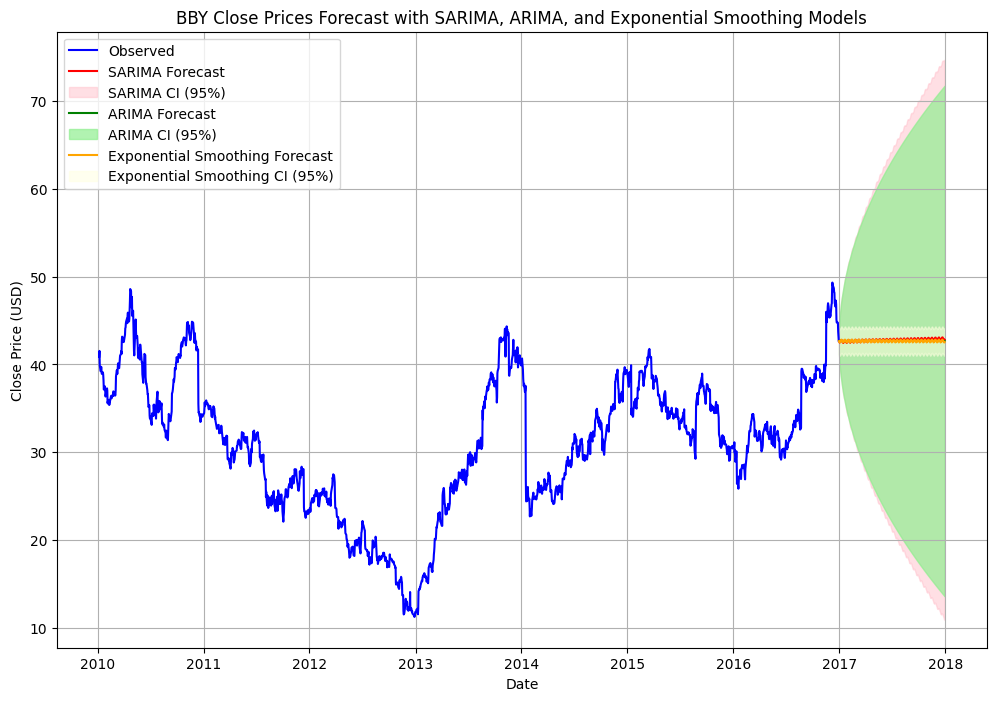

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Inspect the data to identify the date column
# BBY_df.head()  # Uncomment this line if you need to visually inspect the dataframe

# Step 2: Check if the date column is labeled differently (example: Unnamed: 0 or another name)
if 'Unnamed: 0' in BBY_df.columns:
    BBY_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Step 3: Ensure 'date' column is in datetime format and set as index
if 'date' in BBY_df.columns:
    BBY_df['date'] = pd.to_datetime(BBY_df['date'])
    BBY_df.set_index('date', inplace=True)

# Step 4: Fit SARIMA model
sarima_model = SARIMAX(BBY_df['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Step 5: Forecast for the next year (365 days from the last date in the data) using SARIMA
sarima_forecast = sarima_result.get_forecast(steps=365, alpha=0.05)  # 95% confidence intervals
sarima_mean_forecast = sarima_forecast.predicted_mean
sarima_confidence_intervals = sarima_forecast.conf_int()

# Step 6: Fit ARIMA model
arima_model = ARIMA(BBY_df['close'], order=(1, 1, 1))  # Example ARIMA model without seasonal component
arima_result = arima_model.fit()

# Step 7: Forecast for the next year (365 days from the last date in the data) using ARIMA
arima_forecast = arima_result.get_forecast(steps=365, alpha=0.05)  # 95% confidence intervals
arima_mean_forecast = arima_forecast.predicted_mean
arima_confidence_intervals = arima_forecast.conf_int()

# Step 8: Fit Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(BBY_df['close'], seasonal='add', seasonal_periods=12)
exp_smoothing_result = exp_smoothing_model.fit()

# Step 9: Forecast for the next year (365 days from the last date in the data) using Exponential Smoothing
exp_smoothing_mean_forecast = exp_smoothing_result.forecast(steps=365)
# Compute confidence intervals manually (for illustration purposes)
# The standard errors can be adjusted based on the model fit; this is a simple approximation
se = exp_smoothing_result.resid.std()  # Standard error of residuals
confidence_intervals = 1.96 * se  # 95% CI multiplier

exp_smoothing_lower_bound = exp_smoothing_mean_forecast - confidence_intervals
exp_smoothing_upper_bound = exp_smoothing_mean_forecast + confidence_intervals

# Step 10: Get the index for the forecast (starting from the last date)
last_date = BBY_df.index[-1]  # Last date in the dataset
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365, freq='D')  # 365 days starting from the next day

# Step 11: Plot original data, SARIMA forecast, ARIMA forecast, and Exponential Smoothing forecast with confidence intervals
plt.figure(figsize=(12, 8))

# Plot observed data
plt.plot(BBY_df.index, BBY_df['close'], label='Observed', color='blue')

# Plot SARIMA forecast
plt.plot(forecast_index, sarima_mean_forecast, color='red', label='SARIMA Forecast')
plt.fill_between(forecast_index,
                 sarima_confidence_intervals.iloc[:, 0],
                 sarima_confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='SARIMA CI (95%)')

# Plot ARIMA forecast
plt.plot(forecast_index, arima_mean_forecast, color='green', label='ARIMA Forecast')
plt.fill_between(forecast_index,
                 arima_confidence_intervals.iloc[:, 0],
                 arima_confidence_intervals.iloc[:, 1], color='lightgreen', alpha=0.7, label='ARIMA CI (95%)')

# Plot Exponential Smoothing forecast
plt.plot(forecast_index, exp_smoothing_mean_forecast, color='orange', label='Exponential Smoothing Forecast')
plt.fill_between(forecast_index,
                 exp_smoothing_lower_bound,
                 exp_smoothing_upper_bound, color='lightyellow', alpha=0.5, label='Exponential Smoothing CI (95%)')

# Customize the plot
plt.title('BBY Close Prices Forecast with SARIMA, ARIMA, and Exponential Smoothing Models')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend(loc='upper left')  # Move the legend to the top left corner
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keywo

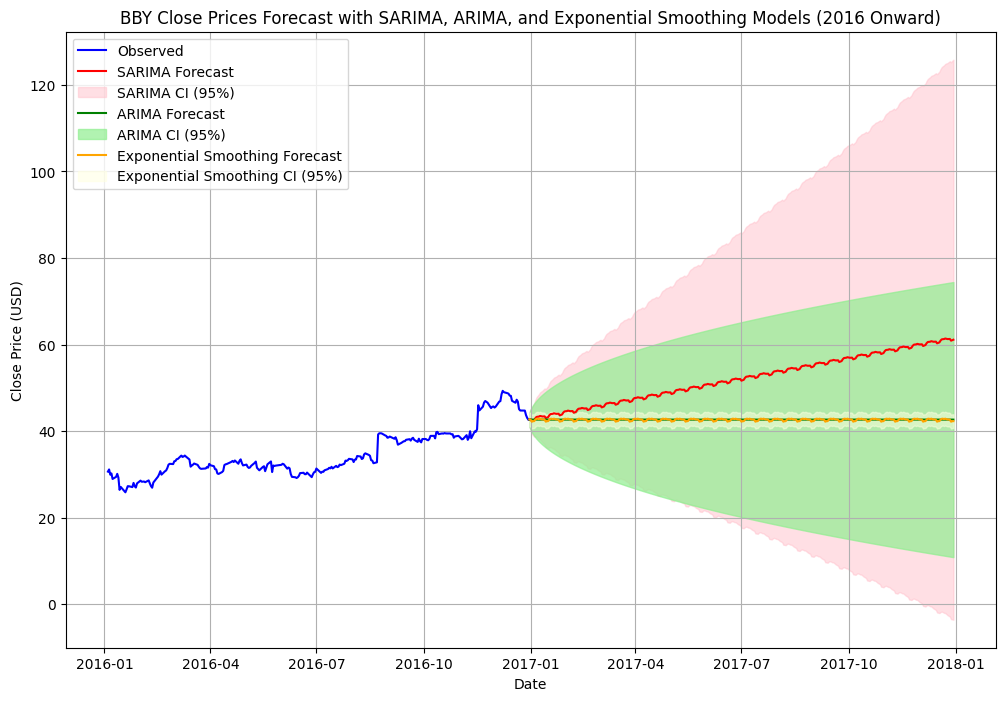

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Inspect the data to identify the date column
# BBY_df.head()  # Uncomment this line if you need to visually inspect the dataframe

# Step 2: Check if the date column is labeled differently (example: Unnamed: 0 or another name)
if 'Unnamed: 0' in BBY_df.columns:
    BBY_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Step 3: Ensure 'date' column is in datetime format and set as index
if 'date' in BBY_df.columns:
    BBY_df['date'] = pd.to_datetime(BBY_df['date'])
    BBY_df.set_index('date', inplace=True)

# Step 4: Filter data to show only from 2016 onward
BBY_df = BBY_df[BBY_df.index >= '2016-01-01']

# Step 5: Fit SARIMA model
sarima_model = SARIMAX(BBY_df['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Step 6: Forecast for the next year (365 days from the last date in the data) using SARIMA
sarima_forecast = sarima_result.get_forecast(steps=365, alpha=0.05)  # 95% confidence intervals
sarima_mean_forecast = sarima_forecast.predicted_mean
sarima_confidence_intervals = sarima_forecast.conf_int()

# Step 7: Fit ARIMA model
arima_model = ARIMA(BBY_df['close'], order=(1, 1, 1))  # Example ARIMA model without seasonal component
arima_result = arima_model.fit()

# Step 8: Forecast for the next year (365 days from the last date in the data) using ARIMA
arima_forecast = arima_result.get_forecast(steps=365, alpha=0.05)  # 95% confidence intervals
arima_mean_forecast = arima_forecast.predicted_mean
arima_confidence_intervals = arima_forecast.conf_int()

# Step 9: Fit Exponential Smoothing model
exp_smoothing_model = ExponentialSmoothing(BBY_df['close'], seasonal='add', seasonal_periods=12)
exp_smoothing_result = exp_smoothing_model.fit()

# Step 10: Forecast for the next year (365 days from the last date in the data) using Exponential Smoothing
exp_smoothing_mean_forecast = exp_smoothing_result.forecast(steps=365)
# Compute confidence intervals manually (for illustration purposes)
# The standard errors can be adjusted based on the model fit; this is a simple approximation
se = exp_smoothing_result.resid.std()  # Standard error of residuals
confidence_intervals = 1.96 * se  # 95% CI multiplier

exp_smoothing_lower_bound = exp_smoothing_mean_forecast - confidence_intervals
exp_smoothing_upper_bound = exp_smoothing_mean_forecast + confidence_intervals

# Step 11: Get the index for the forecast (starting from the last date)
last_date = BBY_df.index[-1]  # Last date in the dataset
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365, freq='D')  # 365 days starting from the next day

# Step 12: Plot original data, SARIMA forecast, ARIMA forecast, and Exponential Smoothing forecast with confidence intervals
plt.figure(figsize=(12, 8))

# Plot observed data
plt.plot(BBY_df.index, BBY_df['close'], label='Observed', color='blue')

# Plot SARIMA forecast
plt.plot(forecast_index, sarima_mean_forecast, color='red', label='SARIMA Forecast')
plt.fill_between(forecast_index,
                 sarima_confidence_intervals.iloc[:, 0],
                 sarima_confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='SARIMA CI (95%)')

# Plot ARIMA forecast
plt.plot(forecast_index, arima_mean_forecast, color='green', label='ARIMA Forecast')
plt.fill_between(forecast_index,
                 arima_confidence_intervals.iloc[:, 0],
                 arima_confidence_intervals.iloc[:, 1], color='lightgreen', alpha=0.7, label='ARIMA CI (95%)')

# Plot Exponential Smoothing forecast
plt.plot(forecast_index, exp_smoothing_mean_forecast, color='orange', label='Exponential Smoothing Forecast')
plt.fill_between(forecast_index,
                 exp_smoothing_lower_bound,
                 exp_smoothing_upper_bound, color='lightyellow', alpha=0.5, label='Exponential Smoothing CI (95%)')

# Customize the plot
plt.title('BBY Close Prices Forecast with SARIMA, ARIMA, and Exponential Smoothing Models (2016 Onward)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend(loc='upper left')  # Move the legend to the top left corner
plt.grid(True)
plt.show()


### Dicky Stats Anaylsis

Dickey-Fuller Test Results:
Statistic: -2.0091744119627983
p-value: 0.2825649840746589
Number of Lags: 0
Number of Observations Used for ADF Regression and Critical Values: 1760
Critical Values:
  1%: -3.4340709449678415
  5%: -2.8631835901181564
  10%: -2.567644997740186


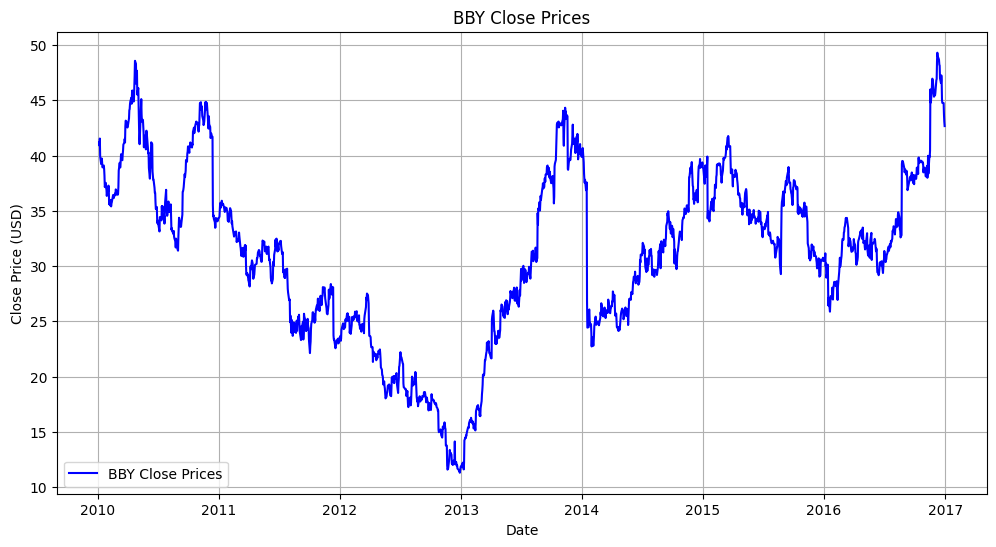

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Assuming BBY_df is already defined and processed
# Step 1: Inspect the data to identify the date column
# BBY_df.head()  # Uncomment this line if you need to visually inspect the dataframe

# Step 2: Check if the date column is labeled differently (example: Unnamed: 0 or another name)
if 'Unnamed: 0' in BBY_df.columns:
    BBY_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Step 3: Ensure 'date' column is in datetime format and set as index
if 'date' in BBY_df.columns:
    BBY_df['date'] = pd.to_datetime(BBY_df['date'])
    BBY_df.set_index('date', inplace=True)

# Step 4: Perform the Augmented Dickey-Fuller test
result = adfuller(BBY_df['close'])

# Step 5: Print the results
print('Dickey-Fuller Test Results:')
print(f'Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Number of Lags: {result[2]}')
print(f'Number of Observations Used for ADF Regression and Critical Values: {result[3]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

# Optional: Plot the time series for visualization
plt.figure(figsize=(12, 6))
plt.plot(BBY_df.index, BBY_df['close'], label='BBY Close Prices', color='blue')
plt.title('BBY Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


Dickey-Fuller Test Results (First Difference):
Statistic: -41.54289619648064
p-value: 0.0
Number of Lags: 0
Number of Observations Used for ADF Regression and Critical Values: 1759
Critical Values:
  1%: -3.4340730634421153
  5%: -2.8631845252929495
  10%: -2.5676454956964605


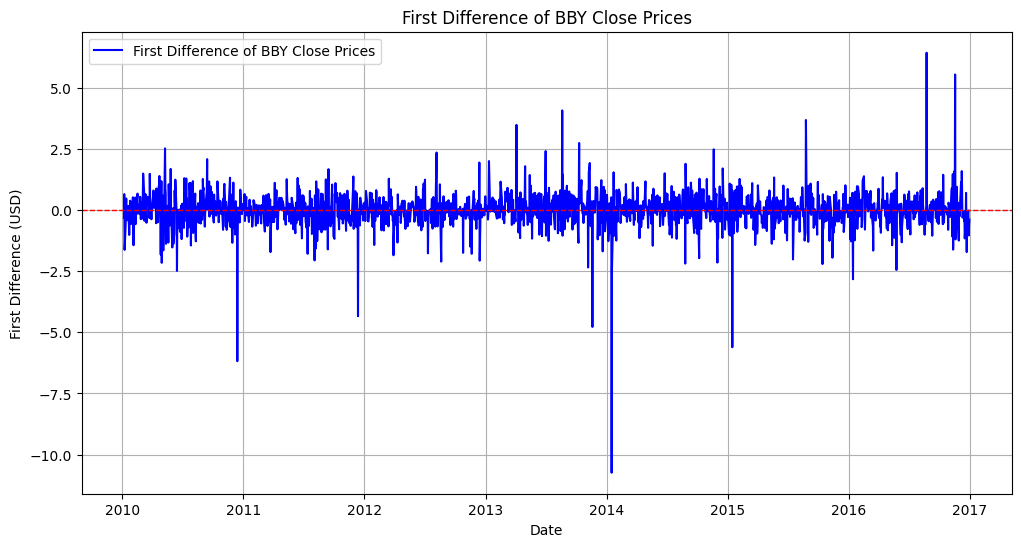

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Assuming BBY_df is already defined and processed
# Step 1: Inspect the data to identify the date column
# BBY_df.head()  # Uncomment this line if you need to visually inspect the dataframe

# Step 2: Check if the date column is labeled differently (example: Unnamed: 0 or another name)
if 'Unnamed: 0' in BBY_df.columns:
    BBY_df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

# Step 3: Ensure 'date' column is in datetime format and set as index
if 'date' in BBY_df.columns:
    BBY_df['date'] = pd.to_datetime(BBY_df['date'])
    BBY_df.set_index('date', inplace=True)

# Step 4: Calculate the first difference of the 'close' prices
BBY_df['close_diff'] = BBY_df['close'].diff()

# Step 5: Drop NaN values that resulted from the differencing
BBY_df.dropna(subset=['close_diff'], inplace=True)

# Step 6: Perform the Augmented Dickey-Fuller test on the first difference
result = adfuller(BBY_df['close_diff'])

# Step 7: Print the results
print('Dickey-Fuller Test Results (First Difference):')
print(f'Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Number of Lags: {result[2]}')
print(f'Number of Observations Used for ADF Regression and Critical Values: {result[3]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'  {key}: {value}')

# Optional: Plot the first difference time series for visualization
plt.figure(figsize=(12, 6))
plt.plot(BBY_df.index, BBY_df['close_diff'], label='First Difference of BBY Close Prices', color='blue')
plt.title('First Difference of BBY Close Prices')
plt.xlabel('Date')
plt.ylabel('First Difference (USD)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0 for reference
plt.legend()
plt.grid(True)
plt.show()


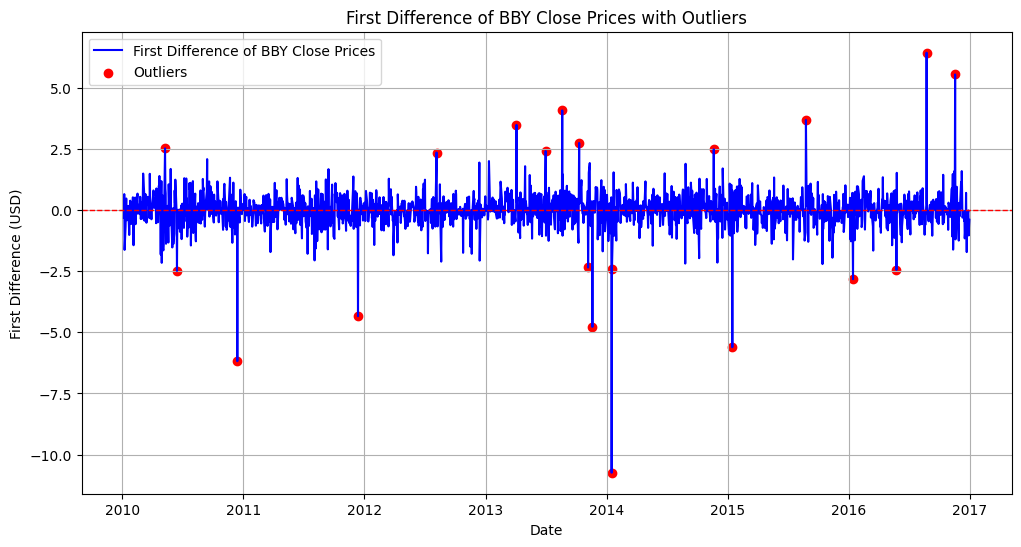

In [ ]:
# prompt: Highlight outliers in the first difference graph above

# Assuming BBY_df and its 'close_diff' column are already calculated as in the previous code

# Step 1: Calculate the mean and standard deviation of the first difference
mean_diff = BBY_df['close_diff'].mean()
std_diff = BBY_df['close_diff'].std()

# Step 2: Define a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3 * std_diff

# Step 3: Identify the outliers
outliers = BBY_df[(BBY_df['close_diff'] > mean_diff + threshold) | (BBY_df['close_diff'] < mean_diff - threshold)]

# Step 4: Plot the first difference with highlighted outliers
plt.figure(figsize=(12, 6))
plt.plot(BBY_df.index, BBY_df['close_diff'], label='First Difference of BBY Close Prices', color='blue')
plt.scatter(outliers.index, outliers['close_diff'], color='red', marker='o', label='Outliers')
plt.title('First Difference of BBY Close Prices with Outliers')
plt.xlabel('Date')
plt.ylabel('First Difference (USD)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0 for reference
plt.legend()
plt.grid(True)
plt.show()
